# Ayudantía N°2

<h2 style ="color: chocolate">PCA Data for Flower Bloomn in Atacama</h2>

Ayudante: Diego Bernal Soto

[Fuentes](https://www.uc.cl/noticias/el-despertar-del-desierto-de-atacama/)

# 🌸Desierto de Atacama🌸

El Desierto Florido es un fenómeno ecológico extraordinario que ocurre en el norte de Chile, especialmente en la **Región de Atacama**, considerada el desierto no polar más árido del mundo. Este evento se manifiesta como una explosión de vida vegetal en zonas desérticas normalmente inhóspitas, a raíz de precipitaciones inusuales concentradas en pocos días durante los meses de otoño e invierno.

Es en este territorio costero, donde cada cierto número de años, las precipitaciones son sumamente altas y esporádicas (variabilidad interanual poco predecible), escenario que estaría relacionado con el fenómeno **'El niño'** (ENSO)

Estas lluvias —aunque escasas— pueden desencadenar un proceso masivo de germinación y floración de especies adaptadas a la aridez extrema, muchas de las cuales permanecen en estado latente durante años.

Este fenómeno ofrece una oportunidad única para el análisis multivariado, modelamiento climático, clasificación de cobertura vegetal vía sensores remotos, y modelado de riesgo ecológico.

### Poema por Alicia Tapia

Benditas lágrimas escasas
ocultas por tantos años
te evocan con vehemencia
crianceros y leñateros.
Más dulce que la ambrosía
se siente sobre los cuerpos
resecos de tanto sol,
hambrientos de tu humedad.

Benditas lágrimas escasas
devuélvenos las flores
y alimenta nuestras recuas.
Perpetuos los aguaceros
se sienten sobre los llanos.
Regálanos tu savia
fertiliza ásperos campos
…concédenos primaveras.

Benditas lágrimas escasas
las horas que nos obsequias
revelan lo prodigioso
del absoluto desierto.
Apacigua con tus lluvias
la agonía nortina,
no olvides estos rincones
requerientes de tus virtudes.

![img](./imgs/img_desierto.png)

In [ ]:
%%capture
!pip install ...

In [59]:
import ipywidgets
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
import pandas as pd
import numpy as np
from fiona.drvsupport import supported_drivers
import googlemaps
from datetime import datetime
import ee
import geemap
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import pyplot
from shapely.geometry import shape
import rasterio.features
from sklearn.preprocessing import StandardScaler
import os
import elevation
import rioxarray as riox
from rasterio.plot import show
from shapely.geometry import Polygon
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [4]:
#Auntenticarse para tomar las imagenes
#ee.Authenticate()
#Inicializar si ya lo hizo
ee.Initialize()

In [5]:
#Traerse los poligonos con las zonas del desierto florido
des_gdf = gpd.read_file("./data/Desierto_flor.shp")

In [7]:
des_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        6 non-null      object  
 1   descriptio  0 non-null      float64 
 2   timestamp   0 non-null      float64 
 3   begin       0 non-null      float64 
 4   end         0 non-null      float64 
 5   altitudeMo  0 non-null      float64 
 6   tessellate  6 non-null      int64   
 7   extrude     6 non-null      int64   
 8   visibility  6 non-null      int64   
 9   drawOrder   0 non-null      float64 
 10  icon        0 non-null      float64 
 11  geometry    6 non-null      geometry
dtypes: float64(7), geometry(1), int64(3), object(1)
memory usage: 708.0+ bytes


In [6]:
des_gdf = des_gdf.iloc[:-3]

In [8]:
uni_poly_des= des_gdf.unary_union

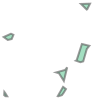

In [10]:
uni_poly_des

In [11]:
poly = uni_poly_des.convex_hull

In [12]:
xx, yy = poly.exterior.coords.xy

# Crear una lista de coordenadas
coordinates = [[x, y] for x, y in zip(xx, yy)]

In [13]:
desierto = ee.Geometry.Polygon(coordinates)
desierto

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              -70.6747055,
              -28.22697
            ],
            [
              -71.0334778,
              -28.2266675
            ],
            [
              -71.0451508,
              -28.226365
            ],
            [
              -71.0544205,
              -28.2188024
            ],
            [
              -71.0578537,
              -27.8097759
            ],
            [
              -71.0066986,
              -27.7868465
            ],
            [
              -70.5136871,
              -27.5770687
            ],
            [
              -70.4505157,
              -27.5752428
            ],
            [
              -70.4553172,
              -27.8715102
            ],
            [
              -70.4981981,
              -27.9811454
            ],
            [
              -70.6355667,
              -28.2015574
            ],
            [
              -70.6482697,
              -28.2188024
            ],
            [
              -70.6747055,
              -28.22697
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})

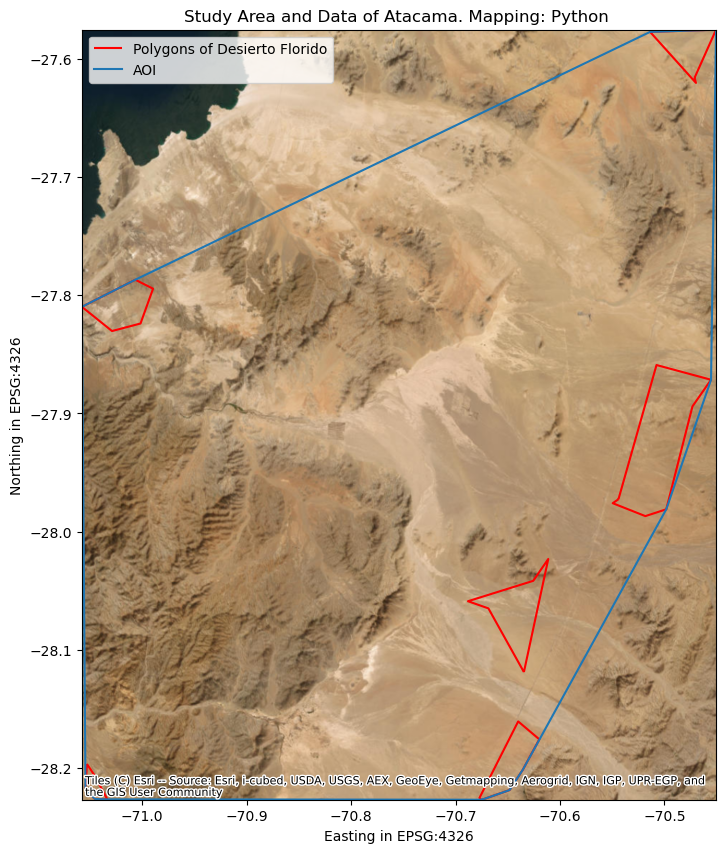

In [14]:
import contextily as ctx
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

x=np.array([p[0] for p in coordinates])
y=np.array([p[1] for p in coordinates])

des_gdf.boundary.plot(ax=ax,color='r',label='Polygons of Desierto Florido')
ax.plot(x,y,label = 'AOI')

ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

ax.legend()

ctx.add_basemap(ax,crs='EPSG:4326', source=ctx.providers.Esri.WorldImagery)


ax.set_title('Study Area and Data of Atacama. Mapping: Python')
ax.set_xlabel('Easting in EPSG:4326')
ax.set_ylabel('Northing in EPSG:4326')

ax.legend(loc='upper left')

plt.show()

Tomemos ahora dos años en los que sabemos que el desierto florido tuvo un gran bloom y agrupemos los datos para sacar conclusiones, en relación a lantiguedad de este fenomeno

In [15]:
x.min(), x.max()

(-71.0578537, -70.4505157)

In [16]:
y.min(), y.max()

(-28.22697, -27.5752428)

In [17]:
coordinates = [
    (-71.0578537, -28.22697),
    (-70.4505157, -28.22697),
    (-70.4505157, -27.5752428),
    (-71.0578537, -27.5752428),
    (-71.0578537, -28.22697) 
]

polygon = Polygon(coordinates)

gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[polygon])

#gdf.to_file("desierto_poli.shp")

In [18]:
xy=[[-71.0578537,-27.5752428],[-70.4505157,-27.5752428],
    [-70.4505157,-28.22697],[-71.0578537,-28.22697],
    [-71.0578537,-27.5752428]]
aoi = ee.Geometry.Polygon(xy)

In [19]:
aoi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              -71.0578537,
              -27.5752428
            ],
            [
              -70.4505157,
              -27.5752428
            ],
            [
              -70.4505157,
              -28.22697
            ],
            [
              -71.0578537,
              -28.22697
            ],
            [
              -71.0578537,
              -27.5752428
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})

<p>Analizar el cambio en el NDVI, bare soil and NDWI con los años puede ser 4 años de estudio para cuatro mapas, esto con el fin de dar luz a LC and Land USE</p>

<p>Enero, julio, Septiembre, Diciembre</p>

In [40]:
colecci_19 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2').filterBounds(desierto).filterDate('2019-01-01', '2019-12-30')

In [41]:
#Filtramos por las nubes
collection_filtrada = colecci_19.filterMetadata('CLOUD_COVER_LAND', 'less_than', 0.15)
images=collection_filtrada.aggregate_array('system:id').getInfo()
images


['LANDSAT/LC08/C02/T1_L2/LC08_001079_20190114',
 'LANDSAT/LC08/C02/T1_L2/LC08_001079_20190522',
 'LANDSAT/LC08/C02/T1_L2/LC08_001079_20190725',
 'LANDSAT/LC08/C02/T1_L2/LC08_001080_20190404',
 'LANDSAT/LC08/C02/T1_L2/LC08_001080_20190522',
 'LANDSAT/LC08/C02/T1_L2/LC08_001080_20191029',
 'LANDSAT/LC08/C02/T1_L2/LC08_001080_20191130']

In [45]:
best_image_2019_ene = ee.Image(images[1])
features = geemap.fishnet(desierto, rows=2, cols=2) #Aplicamos una partición a las imagenes debido a que el tamañano es muy grande

In [48]:
from rasterio import features
from rasterio.enums import MergeAlg
from rasterio.plot import show

<p>Veamos un poco el trabajo en laclasificación de que es cada pixel</p>

In [50]:
src = rasterio.open("./imgs/septem_.tif")

In [52]:
geom_des = [shapes for shapes in des_gdf.geometry]

In [53]:
rasterized_ = features.rasterize(geom_des,
                                out_shape = src.shape,
                                fill = 0,
                                out = None,
                                transform = src.transform,
                                all_touched = False,
                                default_value = 1,
                                dtype = None)

In [54]:
rasterized = features.rasterize(
        [(poly, 1)],
        out_shape=src.shape,
        fill=0,
        out=None,
        transform=src.transform,
        all_touched=False,
        default_value=1,
        dtype=None
    )

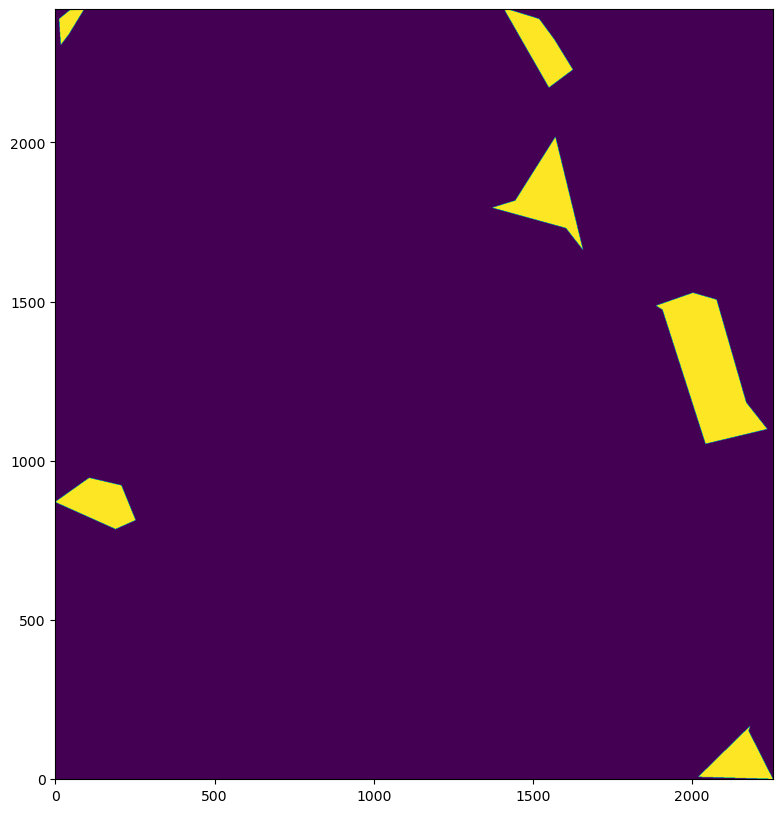

In [55]:
fig, ax = plt.subplots(1, figsize = (10, 10))
show(rasterized_, ax = ax)
plt.gca().invert_yaxis()

In [56]:
red_band = src.read(3)  
nir_band = src.read(5)  
swir_band = src.read(7) 
nir_swir_band = src.read(6)  
blue_band = src.read(1)
green_band = src.read(2)

#Calculo indices espectrales por raster
ndvi = (nir_band - red_band) / (nir_band + red_band)
ndwi = (nir_band - swir_band) / (nir_band + swir_band)
ndbi = (swir_band - nir_swir_band) / (swir_band + nir_swir_band)
bui = ndbi - ndvi
bsi = (swir_band - red_band) / (swir_band + red_band)

indices = np.stack([ndvi, ndwi, bsi], axis=0)

classes = ['Vegetación', 'Agua', 'Open','Void']

void_mask = np.isnan(ndvi)
inside_roi_mask = rasterized_.astype(bool)

classification = np.full(ndvi.shape, classes.index('Void'))

classification[inside_roi_mask] = np.argmax(indices[:, inside_roi_mask], axis=0)


In [124]:
pd.Series(classification.flatten()).value_counts()
#3 is Void
#2 Is bare soil
#0 is vegetation

3    5274873
0     141143
2      36410
Name: count, dtype: int64

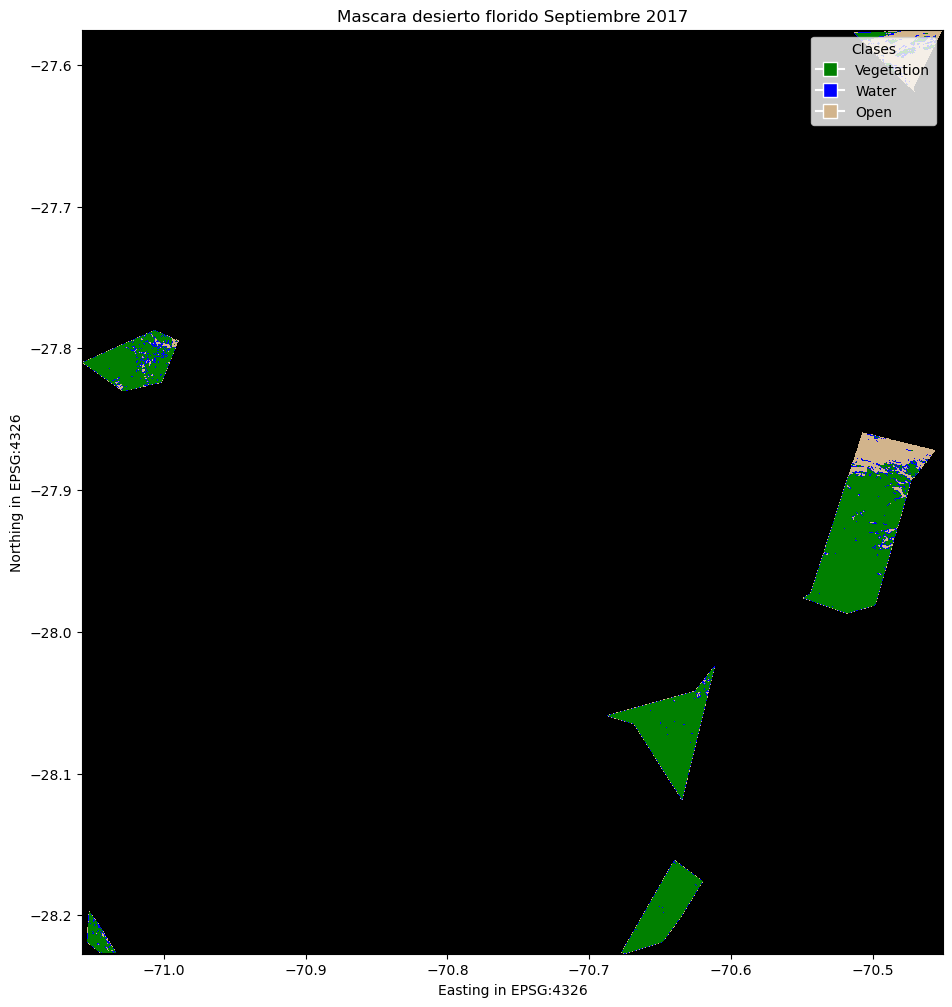

In [60]:
colors = ['green', 'blue', 'tan','black']  # Asigna colores a cada clase

cmap = ListedColormap(colors)

fig, ax = plt.subplots(figsize=(12, 12))

img = ax.imshow(classification, cmap=cmap, extent=(src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top))

legend_labels = ['Vegetation', 'Water', 'Open']
legend_elements = [Line2D([0], [0], marker='s', color='w', label=label, markersize=10, markerfacecolor=color)
                  for label, color in zip(legend_labels, colors)]
ax.legend(handles=legend_elements, title='Clases', loc='upper right')

ax.set_title('Mascara desierto florido Septiembre 2017')
ax.set_xlabel('Easting in EPSG:4326')
ax.set_ylabel('Northing in EPSG:4326')

plt.show()

<p>Con esto agregaremos distintas variables a nuestra investigación como la lluvia en una ventana de tiempo en el pasado o tambien las condiciones topograficas del terreno.</p>

In [82]:
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

In [62]:
#Empecemos con la exploración de los datos
gpd_17 = gpd.read_file("./data/gdf_9_17.shp")
gpd_19 = gpd.read_file("./data/gdf_9_19.shp")

In [63]:
gpd_17.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   val_s     5434 non-null   float64 
 1   ndvi_mn   4287 non-null   float64 
 2   ndwi_mn   4287 non-null   float64 
 3   bsi_men   4287 non-null   float64 
 4   bui_men   4287 non-null   float64 
 5   elevatn   5434 non-null   float64 
 6   slope     5427 non-null   float64 
 7   aspect    5427 non-null   float64 
 8   rnfl_2_   5434 non-null   float64 
 9   geometry  5434 non-null   geometry
dtypes: float64(9), geometry(1)
memory usage: 424.7 KB


In [65]:
gpd_17['val_s'].unique()

array([0., 2.])

In [67]:
filtered_gdf = gpd_17[gpd_17['val_s'] == 0]

if gpd_17.crs.is_geographic:
    filtered_gdf = filtered_gdf.to_crs(epsg=32719)  # CRS UTM zona 19S, asegúrate de que es el adecuado para tu área

filtered_gdf['area_m2'] = filtered_gdf.area
total_area = filtered_gdf['area_m2'].sum()/1000000

print(total_area)

111.6671663136805


Limpiar valores NA

In [68]:
gpd_17.dropna(inplace=True)
gpd_19.dropna(inplace=True)

In [69]:
gpd_17

,val_s,ndvi_mn,ndwi_mn,bsi_men,bui_men,elevatn,slope,aspect,rnfl_2_,geometry
0,0.0,0.269027,0.015581,0.254513,-0.313864,171.500000,0.029730,2.871109,11.252427,"POLYGON ((-71.03037 -27.82931, -71.03053 -27.8..."
1,0.0,0.255342,-0.012228,0.266738,-0.290160,173.437500,0.029730,4.464371,11.252427,"POLYGON ((-71.02901 -27.83027, -71.03037 -27.8..."
2,0.0,0.288235,0.040155,0.250985,-0.327354,175.857143,0.012616,4.481264,11.252427,"POLYGON ((-71.02713 -27.82983, -71.02875 -27.8..."
3,0.0,0.216499,-0.009595,0.225626,-0.235152,176.769231,0.031432,3.494988,11.252427,"POLYGON ((-71.02551 -27.82945, -71.02713 -27.8..."
4,0.0,0.218072,-0.028955,0.245477,-0.243924,177.750000,0.013437,5.534102,11.252427,"POLYGON ((-71.02441 -27.82920, -71.02551 -27.8..."
...,...,...,...,...,...,...,...,...,...,...
5422,2.0,0.180610,-0.077769,0.254800,-0.184748,540.222222,0.044442,4.019337,5.158874,"POLYGON ((-70.46443 -27.57565, -70.46281 -27.5..."
5423,2.0,0.201189,-0.052730,0.251253,-0.216749,548.633333,0.070180,4.178107,5.158874,"POLYGON ((-70.46281 -27.57560, -70.46119 -27.5..."
5424,2.0,0.193827,-0.071754,0.261938,-0.200941,551.133333,0.057692,4.146261,5.158874,"POLYGON ((-70.46119 -27.57555, -70.45958 -27.5..."
5426,2.0,0.209808,-0.067241,0.273194,-0.218256,561.600000,0.053682,4.348008,5.158874,"POLYGON ((-70.45796 -27.57546, -70.45634 -27.5..."


Tenemos clases desbalanceadas

In [132]:
print(f"La cantidad de tierra abierta es {round((gpd_17['val_s'] == 2).sum() / len(gpd_17) * 100)}%")
print(f"La cantidad de vegetación es {round((gpd_17['val_s'] == 0).sum() / len(gpd_17) * 100)}%")

La cantidad de tierra abierta es 25%
La cantidad de vegetación es 75%


In [73]:
geom_09_17 = gpd_17[['geometry']].copy()
geom_09_19 = gpd_19[['geometry']].copy()

In [75]:
gpd_17 = gpd_17.drop('geometry', axis=1)
gpd_19 = gpd_19.drop('geometry', axis=1)

In [76]:
gpd_17.describe().T

,count,mean,std,min,25%,50%,75%,max
val_s,4283.0,0.496848,0.864299,0.000000,0.000000,0.000000,0.000000,2.000000
ndvi_mn,4283.0,0.284487,0.058418,0.103884,0.241131,0.274293,0.319998,0.606377
ndwi_mn,4283.0,0.033291,0.077639,-0.119867,-0.023061,0.016373,0.077107,0.438966
bsi_men,4283.0,0.253922,0.043798,0.065850,0.225287,0.253216,0.283953,0.382528
bui_men,4283.0,-0.344157,0.078257,-0.775143,-0.392413,-0.332728,-0.285573,-0.153246
elevatn,4283.0,485.472737,126.859297,169.000000,478.392857,520.000000,564.958333,690.500000
slope,4283.0,0.068547,0.051873,0.000000,0.034843,0.056554,0.086208,0.448309
aspect,4283.0,4.242871,0.794089,0.000000,3.830237,4.315385,4.748270,6.211600
rnfl_2_,4283.0,8.796797,1.698992,5.158874,8.110231,8.904380,9.502604,11.776845


In [77]:
gpd_19.describe().T

,count,mean,std,min,25%,50%,75%,max
val_s,4283.0,1.971982,0.235082,0.000000,2.000000,2.000000,2.000000,2.000000
ndvi_mn,4283.0,0.210733,0.028273,0.088739,0.190431,0.205104,0.225783,0.315430
ndwi_mn,4283.0,-0.087228,0.045981,-0.281796,-0.110949,-0.080720,-0.060378,0.073026
bsi_men,4283.0,0.292226,0.046595,0.139969,0.262746,0.287085,0.319969,0.491809
bui_men,4283.0,-0.246285,0.031665,-0.418626,-0.261287,-0.242760,-0.224753,-0.140853
elevatn,4283.0,485.472737,126.859297,169.000000,478.392857,520.000000,564.958333,690.500000
slope,4283.0,0.068547,0.051873,0.000000,0.034843,0.056554,0.086208,0.448309
aspect,4283.0,4.242871,0.794089,0.000000,3.830237,4.315385,4.748270,6.211600
rnfl_2_,4283.0,8.805662,1.322066,6.304854,8.614798,8.764870,9.158031,11.681840


In [78]:
corr_17 = gpd_17.corr()
corr_19 = gpd_19.corr()

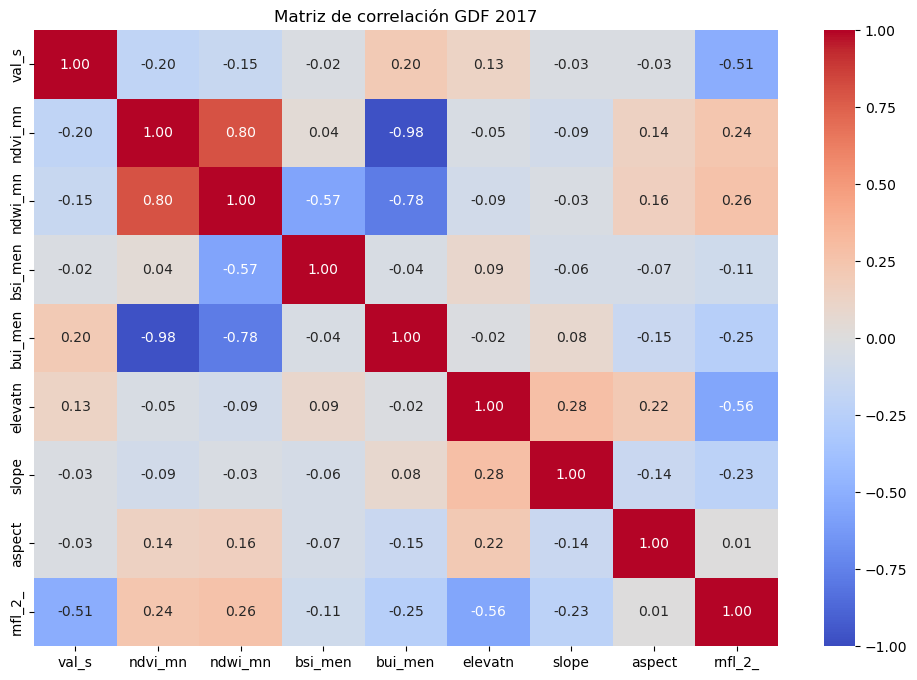

In [79]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(corr_17, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')

plt.title('Matriz de correlación GDF 2017')

plt.show()

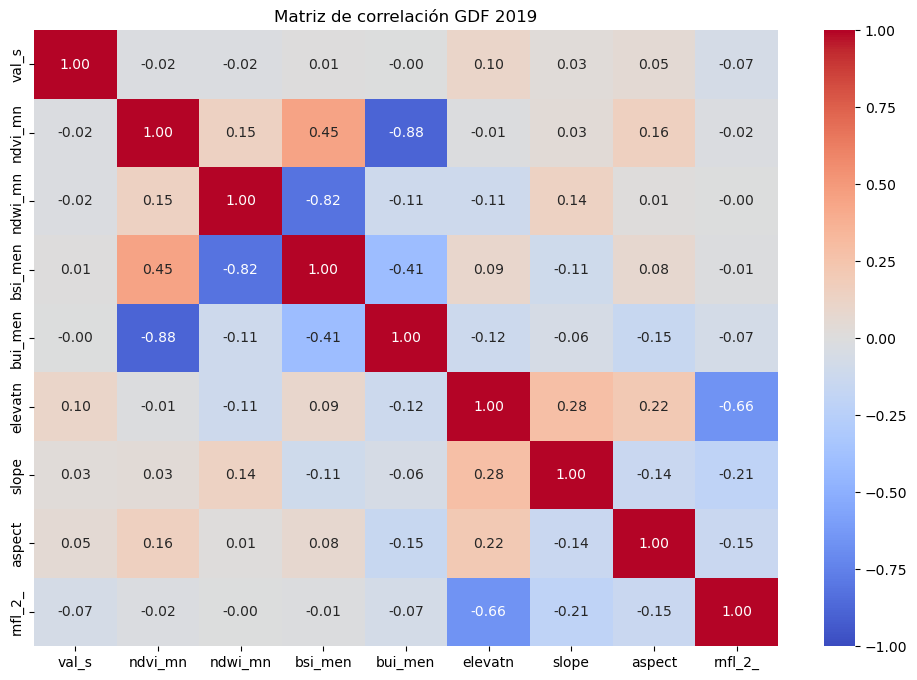

In [80]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(corr_19, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')

plt.title('Matriz de correlación GDF 2019')

plt.show()

In [81]:
scaler = preprocessing.StandardScaler()#Estandarizar por media y dividido en devest
gpd_17.iloc[:, 1:]= scaler.fit_transform(gpd_17.iloc[:, 1:]) #omitiendo el calsificador

Utilicemos las funciones de PCA y probemos con sckit-learn tambien 

In [84]:
from pca import generate_n_dimensions, calculate_pca

In [ ]:
labels = {
    0:'Vegetación',
    2:'Tierra'
}

gpd_17['clases'] = gpd_17['val_s'].map(labels)

In [157]:
columns= ['ndvi_mn','ndwi_mn','bsi_men','bui_men','elevatn','slope','aspect','rnfl_2_']
X = gpd_17[columns].values
Y = gpd_17['clases'].values

In [160]:
pca_manual, u_d,pve = calculate_pca(X,n_components=2)

In [162]:
X_origin = np.zeros(len(u_d))
Y_origin = np.zeros(len(u_d))

U = u_d[:, 0]
V = u_d[:, 1]

colors = plt.cm.viridis(np.linspace(0, 1, len(u_d)))

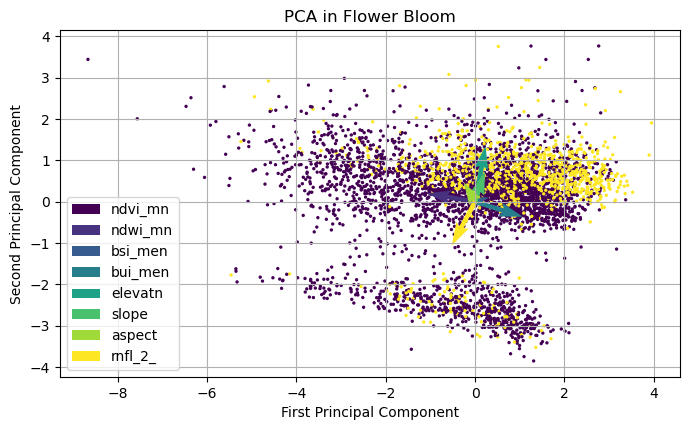

In [173]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))
ax.scatter(pca_manual[:,0], pca_manual[:,1],s=2,c=gpd_17['val_s'])
for i in range(len(columns)):
    ax.quiver(X_origin[i], Y_origin[i], U[i], V[i], color=colors[i], angles='xy', scale_units='xy', scale=0.5,label = columns[i])
ax.grid(True)
ax.set_title("PCA in Flower Bloom")
ax.set_xlabel("First Principal Component"); ax.set_ylabel("Second Principal Component")
ax.legend()
plt.show()

In [174]:
pve_list = []
components = X.shape[1]
for k in range(1,components):
    _,_,pve = calculate_pca(X,k)
    pve_list.append(np.sum(pve))

In [175]:
pve_list

[0.3659892784853032,
 0.5732822835162281,
 0.7303572781583816,
 0.8653386409765735,
 0.9501936124593232,
 0.9969806262163519,
 0.9999650754926294]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


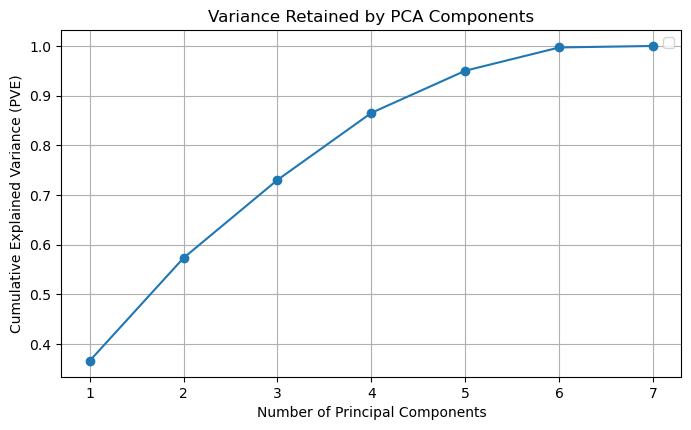

In [176]:
fig, ax =plt.subplots(1,1,figsize = (8,4.5))
x_vals = np.arange(1, len(pve_list) + 1)
ax.plot(x_vals, pve_list, marker='o')

ax.set_xticks(x_vals)  # Force integer ticks on x-axis
ax.set_title('Variance Retained by PCA Components')
ax.set_xlabel('Number of Principal Components');ax.set_ylabel('Cumulative Explained Variance (PVE)')
ax.grid(True)
ax.legend()
plt.show()

In [177]:
from pca import expected_pve

<p>Probemos con sckit learn</p>



In [178]:
#Podemos variar el n_componentes
pca_17 = PCA(n_components=6)
pca_17.fit(X)

PCA(n_components=6)

In [179]:
#Función del curso Mineria de datos 2023, Profesor Marcelo Mendoza UC
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i

min_var(0.95,pca_17.explained_variance_ratio_)

5

TSNE and UMAP

In [180]:
tsne_embed = TSNE(n_components=2, perplexity = 2141, n_iter=500, n_iter_without_progress=150, n_jobs=10)
projection_tsne = tsne_embed.fit_transform(X)
tsne_df = pd.DataFrame(projection_tsne, columns=['dim 1', 'dim 2'])

In [181]:
umap_2d = umap.UMAP(n_components = 2, min_dist = 0.5, n_neighbors= 50, n_jobs=10)
projection_umap = umap_2d.fit_transform(X)
umap_df = pd.DataFrame(projection_umap, columns = ['dim 1', 'dim 2'])

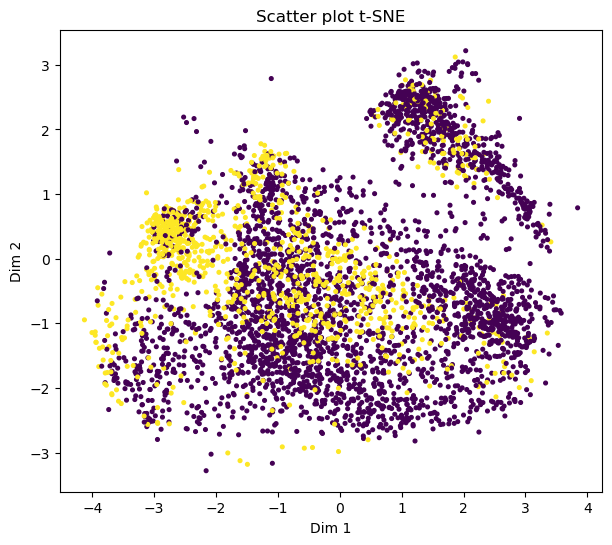

In [182]:
fig, axes = plt.subplots(figsize=(7, 6))
scatter = axes.scatter(tsne_df['dim 1'], tsne_df['dim 2'],c = gpd_17['val_s'],cmap="viridis",s=7)

axes.set_xlabel('Dim 1')
axes.set_ylabel('Dim 2')
axes.set_title('Scatter plot t-SNE')

plt.show()

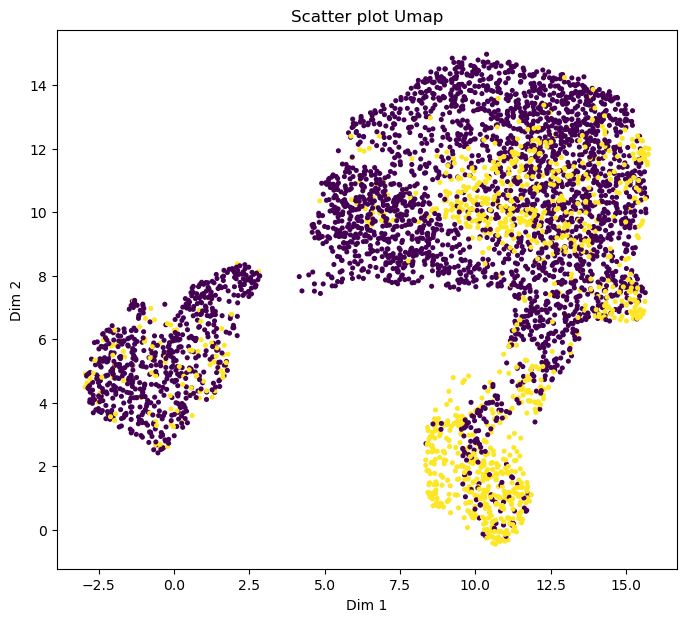

In [183]:
fig, axes = plt.subplots(figsize=(8, 7))
scatter = axes.scatter(umap_df['dim 1'], umap_df['dim 2'],c = gpd_17['val_s'],cmap="viridis",s=7)

axes.set_xlabel('Dim 1')
axes.set_ylabel('Dim 2')
axes.set_title('Scatter plot Umap')

plt.show()